In [1]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('data/occupation_exposure_eval_data.xlsx')

In [3]:
def evaluate_predictions(y_true, y_pred):
    # Calculate precision, recall, F1-score, and support for each class
    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average=None)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate micro-average precision, recall, F1-score
    micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='micro')

    # Calculate macro-average precision, recall, F1-score
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')

    # Print results
    print("Class\t\tPrecision\tRecall\t\tF1-score\tSupport")
    for i in range(len(precision)):
        print(f"Class {i+1}\t\t{precision[i]:.2f}\t\t{recall[i]:.2f}\t\t{f1[i]:.2f}\t\t{support[i]}")
    print(f"\nAccuracy: {accuracy:.2f}")
    print(f"Micro-average precision: {micro_precision:.2f}")
    print(f"Micro-average recall: {micro_recall:.2f}")
    print(f"Micro-average F1-score: {micro_f1:.2f}")
    print(f"Macro-average precision: {macro_precision:.2f}")
    print(f"Macro-average recall: {macro_recall:.2f}")
    print(f"Macro-average F1-score: {macro_f1:.2f}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


Evaluation for label_siahaan:
Class		Precision	Recall		F1-score	Support
Class 1		0.55		0.88		0.68		24
Class 2		0.25		0.08		0.12		13
Class 3		0.00		0.00		0.00		6

Accuracy: 0.51
Micro-average precision: 0.51
Micro-average recall: 0.51
Micro-average F1-score: 0.51
Macro-average precision: 0.27
Macro-average recall: 0.32
Macro-average F1-score: 0.27


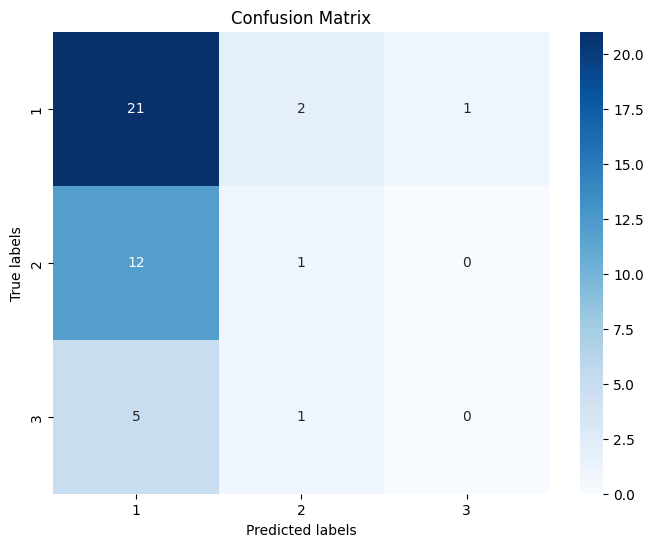


Evaluation for label_webb:
Class		Precision	Recall		F1-score	Support
Class 1		0.71		0.42		0.53		24
Class 2		0.36		0.69		0.47		13
Class 3		0.25		0.17		0.20		6

Accuracy: 0.47
Micro-average precision: 0.47
Micro-average recall: 0.47
Micro-average F1-score: 0.47
Macro-average precision: 0.44
Macro-average recall: 0.43
Macro-average F1-score: 0.40


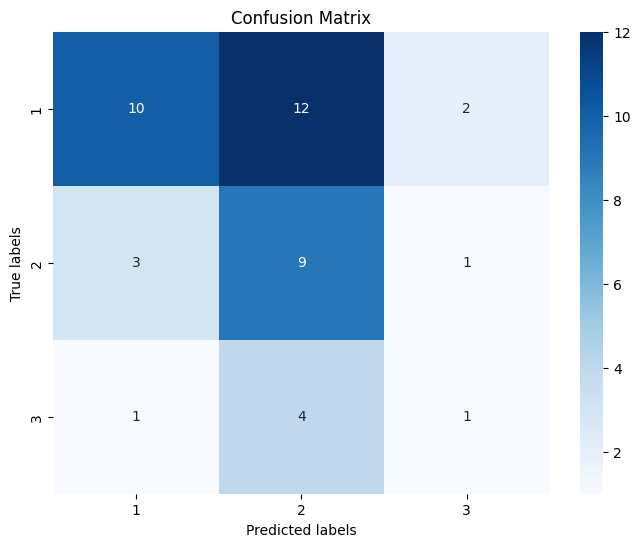


Evaluation for label_johann:
Class		Precision	Recall		F1-score	Support
Class 1		0.75		0.50		0.60		24
Class 2		0.38		0.77		0.51		13
Class 3		0.00		0.00		0.00		6

Accuracy: 0.51
Micro-average precision: 0.51
Micro-average recall: 0.51
Micro-average F1-score: 0.51
Macro-average precision: 0.38
Macro-average recall: 0.42
Macro-average F1-score: 0.37


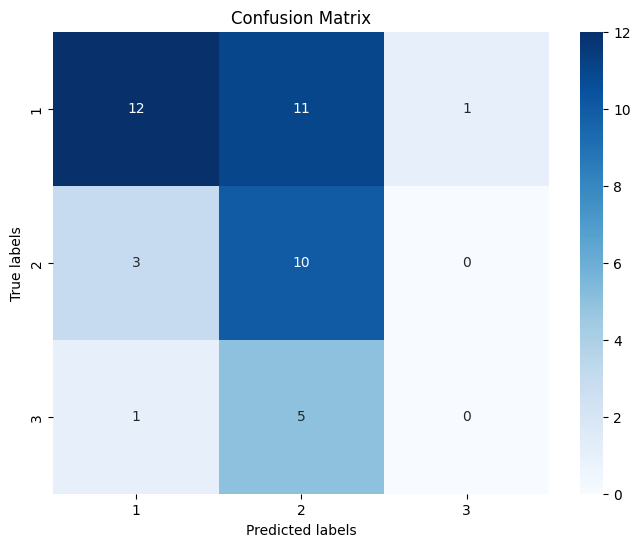


Evaluation for label_new_pattern:
Class		Precision	Recall		F1-score	Support
Class 1		0.54		0.88		0.67		24
Class 2		0.00		0.00		0.00		13
Class 3		0.00		0.00		0.00		6

Accuracy: 0.49
Micro-average precision: 0.49
Micro-average recall: 0.49
Micro-average F1-score: 0.49
Macro-average precision: 0.18
Macro-average recall: 0.29
Macro-average F1-score: 0.22


c:\Users\oktav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\oktav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


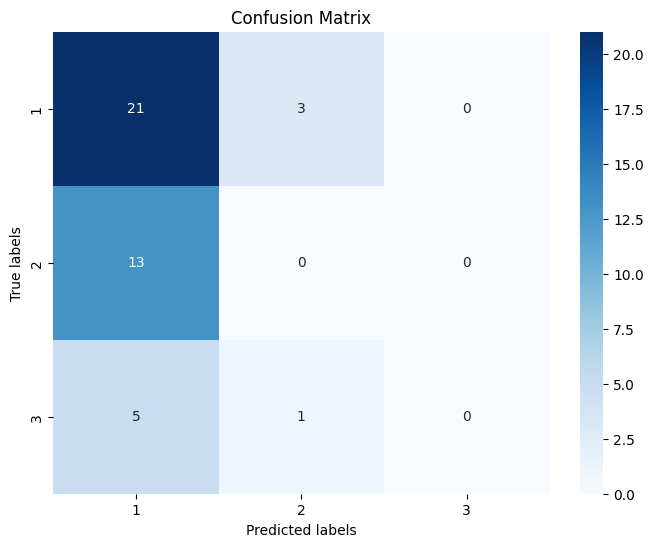

In [4]:
# Eval with Anotator 1, 2, and 3

y_true = data['Expected Label R123']
y_pred_raharjana = data['label_siahaan']
y_pred_webb = data['label_webb']
y_pred_johann = data['label_johann']
y_pred_new_pattern = data['label_new_pattern']

print("Evaluation for label_siahaan:")
evaluate_predictions(y_true, y_pred_raharjana)

print("\nEvaluation for label_webb:")
evaluate_predictions(y_true, y_pred_webb)

print("\nEvaluation for label_johann:")
evaluate_predictions(y_true, y_pred_johann)

print("\nEvaluation for label_new_pattern:")
evaluate_predictions(y_true, y_pred_new_pattern)

Evaluation for label_siahaan:
Class		Precision	Recall		F1-score	Support
Class 1		0.58		0.88		0.70		25
Class 2		0.25		0.08		0.12		13
Class 3		0.00		0.00		0.00		5

Accuracy: 0.53
Micro-average precision: 0.53
Micro-average recall: 0.53
Micro-average F1-score: 0.53
Macro-average precision: 0.28
Macro-average recall: 0.32
Macro-average F1-score: 0.27


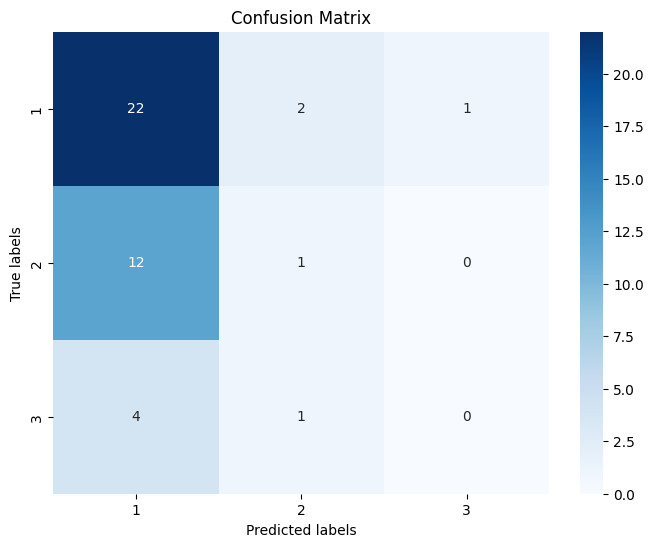


Evaluation for label_webb:
Class		Precision	Recall		F1-score	Support
Class 1		0.71		0.40		0.51		25
Class 2		0.36		0.69		0.47		13
Class 3		0.25		0.20		0.22		5

Accuracy: 0.47
Micro-average precision: 0.47
Micro-average recall: 0.47
Micro-average F1-score: 0.47
Macro-average precision: 0.44
Macro-average recall: 0.43
Macro-average F1-score: 0.40


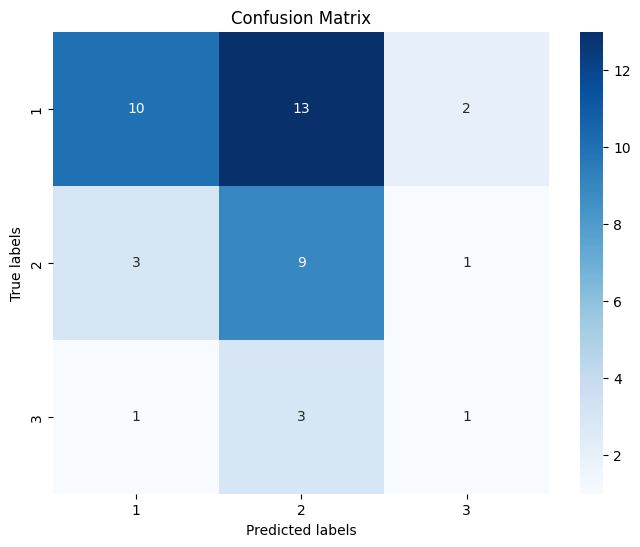


Evaluation for label_johann:
Class		Precision	Recall		F1-score	Support
Class 1		0.75		0.48		0.59		25
Class 2		0.38		0.77		0.51		13
Class 3		0.00		0.00		0.00		5

Accuracy: 0.51
Micro-average precision: 0.51
Micro-average recall: 0.51
Micro-average F1-score: 0.51
Macro-average precision: 0.38
Macro-average recall: 0.42
Macro-average F1-score: 0.37


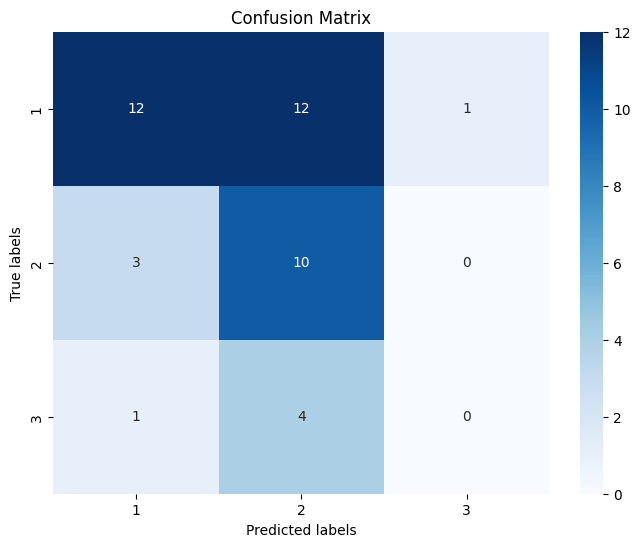


Evaluation for label_new_pattern:
Class		Precision	Recall		F1-score	Support
Class 1		0.56		0.88		0.69		25
Class 2		0.00		0.00		0.00		13
Class 3		0.00		0.00		0.00		5

Accuracy: 0.51
Micro-average precision: 0.51
Micro-average recall: 0.51
Micro-average F1-score: 0.51
Macro-average precision: 0.19
Macro-average recall: 0.29
Macro-average F1-score: 0.23


c:\Users\oktav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\oktav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


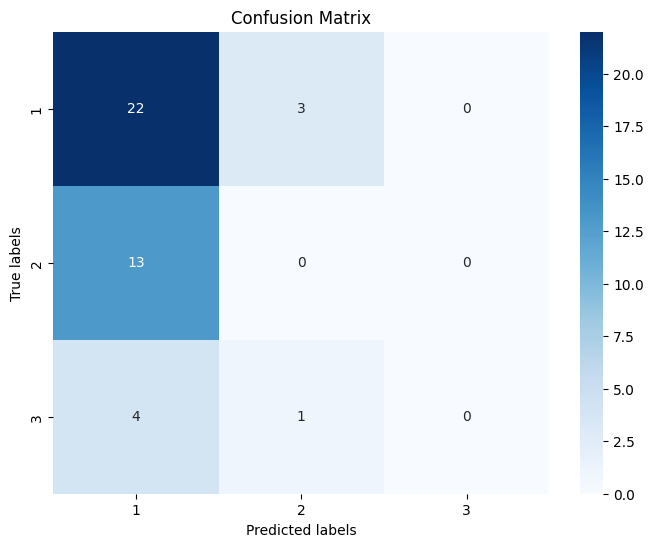

In [5]:
# Eval with Anotator 1, 2, 3, 4, and 5

y_true = data['Expected Label R12345']
y_pred_raharjana = data['label_siahaan']
y_pred_webb = data['label_webb']
y_pred_johann = data['label_johann']
y_pred_new_pattern = data['label_new_pattern']

print("Evaluation for label_siahaan:")
evaluate_predictions(y_true, y_pred_raharjana)

print("\nEvaluation for label_webb:")
evaluate_predictions(y_true, y_pred_webb)

print("\nEvaluation for label_johann:")
evaluate_predictions(y_true, y_pred_johann)

print("\nEvaluation for label_new_pattern:")
evaluate_predictions(y_true, y_pred_new_pattern)

Evaluation for label_siahaan:
Class		Precision	Recall		F1-score	Support
Class 1		0.24		0.90		0.38		10
Class 2		0.50		0.08		0.14		24
Class 3		0.00		0.00		0.00		9

Accuracy: 0.26
Micro-average precision: 0.26
Micro-average recall: 0.26
Micro-average F1-score: 0.26
Macro-average precision: 0.25
Macro-average recall: 0.33
Macro-average F1-score: 0.17


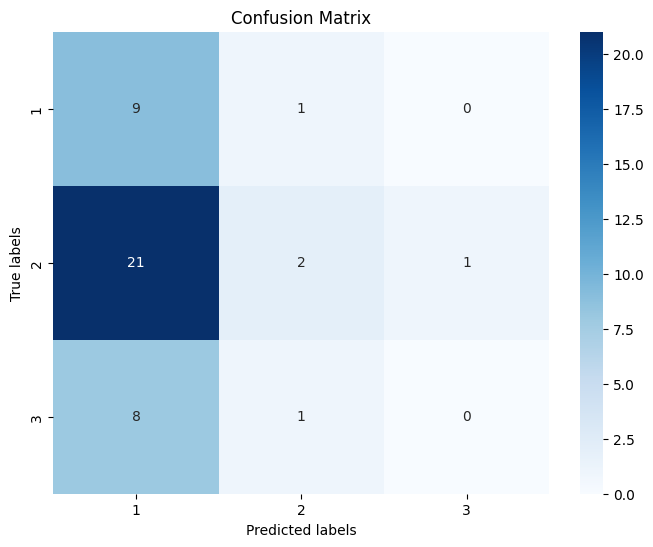


Evaluation for label_webb:
Class		Precision	Recall		F1-score	Support
Class 1		0.14		0.20		0.17		10
Class 2		0.40		0.42		0.41		24
Class 3		0.00		0.00		0.00		9

Accuracy: 0.28
Micro-average precision: 0.28
Micro-average recall: 0.28
Micro-average F1-score: 0.28
Macro-average precision: 0.18
Macro-average recall: 0.21
Macro-average F1-score: 0.19


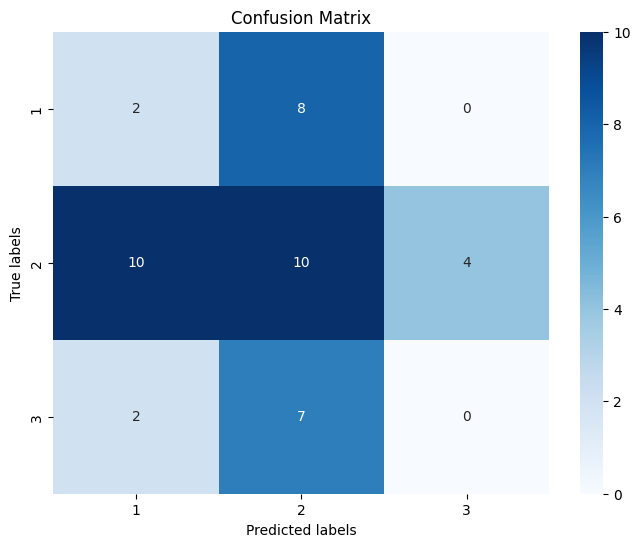


Evaluation for label_johann:
Class		Precision	Recall		F1-score	Support
Class 1		0.19		0.30		0.23		10
Class 2		0.46		0.50		0.48		24
Class 3		0.00		0.00		0.00		9

Accuracy: 0.35
Micro-average precision: 0.35
Micro-average recall: 0.35
Micro-average F1-score: 0.35
Macro-average precision: 0.22
Macro-average recall: 0.27
Macro-average F1-score: 0.24


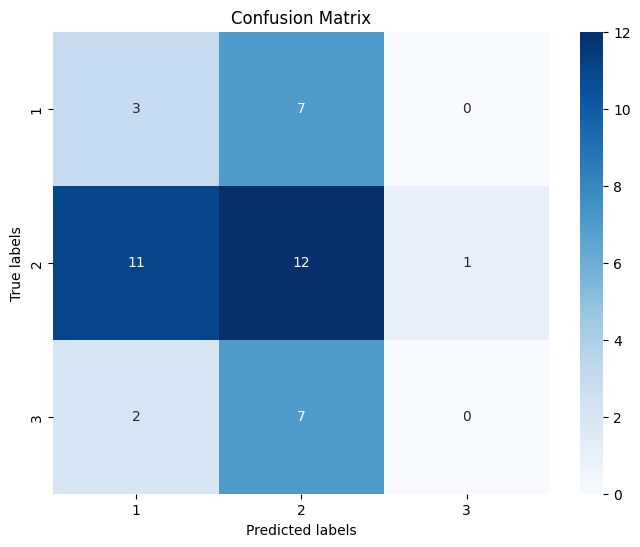


Evaluation for label_new_pattern:
Class		Precision	Recall		F1-score	Support
Class 1		0.23		0.90		0.37		10
Class 2		0.50		0.08		0.14		24
Class 3		0.00		0.00		0.00		9

Accuracy: 0.26
Micro-average precision: 0.26
Micro-average recall: 0.26
Micro-average F1-score: 0.26
Macro-average precision: 0.24
Macro-average recall: 0.33
Macro-average F1-score: 0.17


c:\Users\oktav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\oktav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


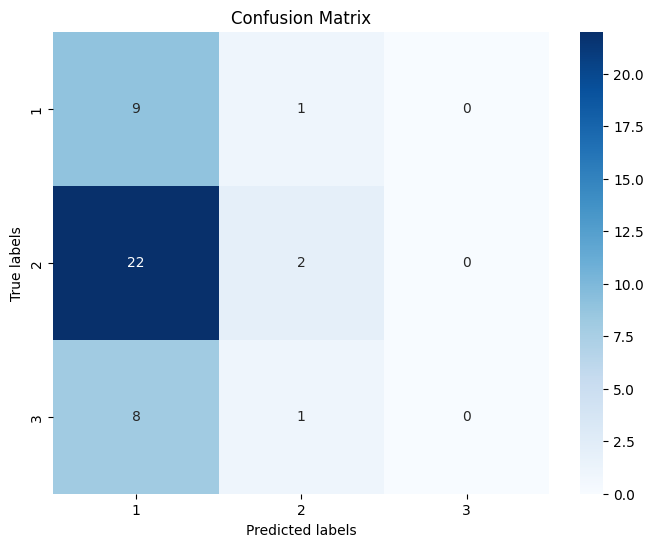

In [6]:
# Eval with Anotator Oki

y_true = data['Expected Label Oki']
y_pred_raharjana = data['label_siahaan']
y_pred_webb = data['label_webb']
y_pred_johann = data['label_johann']
y_pred_new_pattern = data['label_new_pattern']

print("Evaluation for label_siahaan:")
evaluate_predictions(y_true, y_pred_raharjana)

print("\nEvaluation for label_webb:")
evaluate_predictions(y_true, y_pred_webb)

print("\nEvaluation for label_johann:")
evaluate_predictions(y_true, y_pred_johann)

print("\nEvaluation for label_new_pattern:")
evaluate_predictions(y_true, y_pred_new_pattern)